In [30]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [31]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [34]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

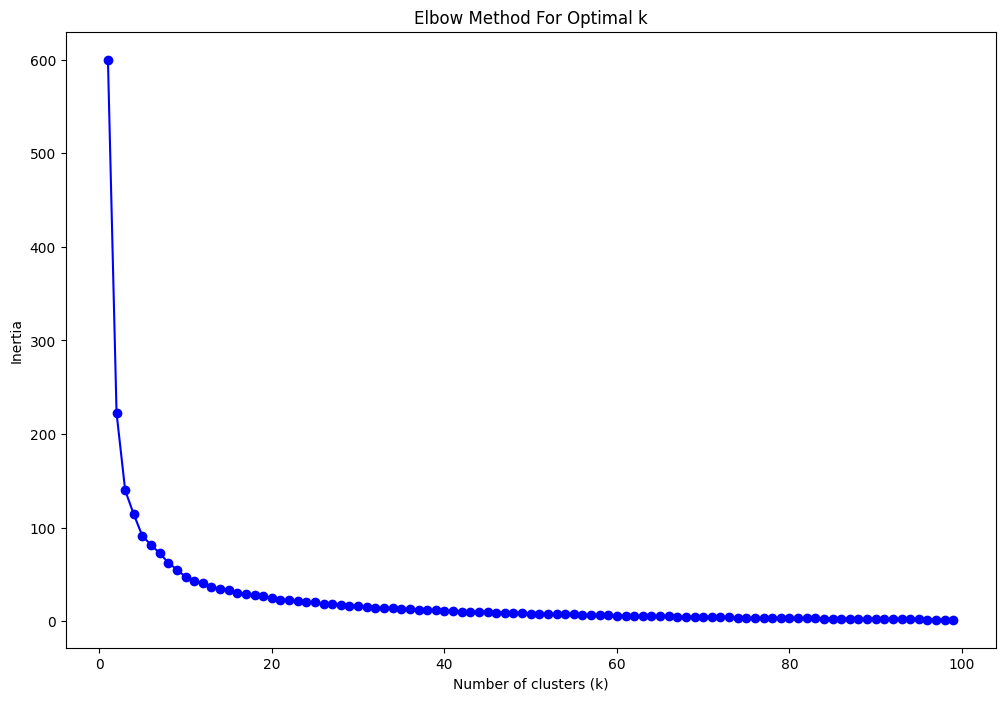

In [35]:
inertia = []
K = range(1, 100)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
optimal_k = 7 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

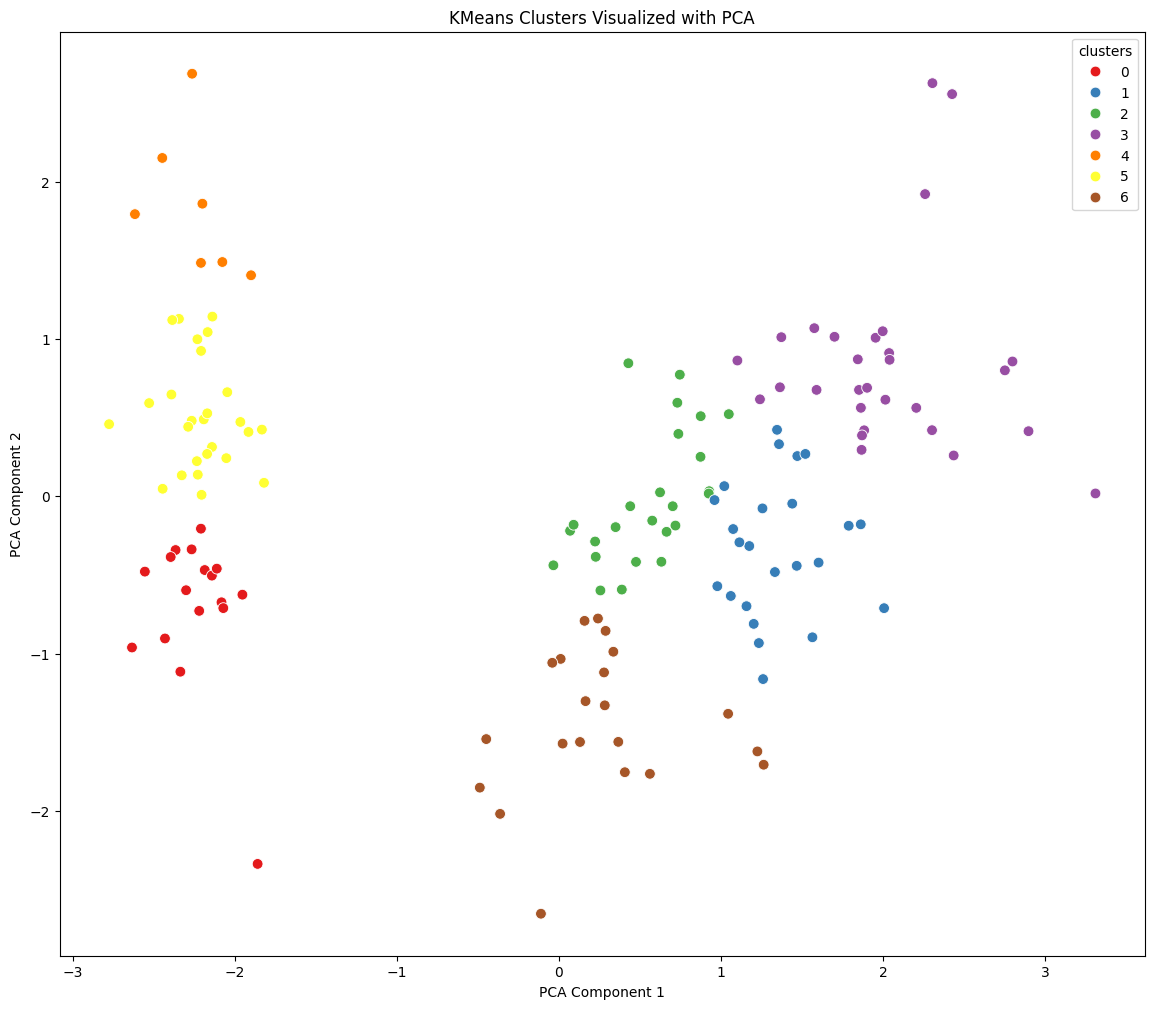

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(14, 12))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set1', s=60)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='clusters')
plt.show()

In [38]:
df['cluster'] = clusters

mean_per_cluster = df.groupby('cluster').mean()
median_per_cluster = df.groupby('cluster').median()

print("Mean per cluster:\n", mean_per_cluster)
print("\nMedian per cluster:\n", median_per_cluster)

Mean per cluster:
          sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 4.688235          3.035294           1.400000   
1                 6.232000          2.780000           5.164000   
2                 6.044000          2.992000           4.416000   
3                 6.996552          3.158621           5.800000   
4                 5.528571          4.042857           1.471429   
5                 5.073077          3.519231           1.500000   
6                 5.542857          2.442857           3.947619   

         petal width (cm)      pca1      pca2  
cluster                                        
0                0.194118 -2.240919 -0.696480  
1                1.812000  1.336711 -0.338144  
2                1.420000  0.548344 -0.018488  
3                2.124138  2.026562  0.852569  
4                0.285714 -2.243410  1.838350  
5                0.269231 -2.209160  0.51